In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
import numpy as np
from collections import Counter
import pandas as pd

## Load Data

In [3]:
# Define the base path
base_path = "data/r4.2/"

# Load each CSV file into a separate DataFrame
device_df = pd.read_csv(base_path + "device.csv")
email_df = pd.read_csv(base_path + "email.csv")
file_df = pd.read_csv(base_path + "file.csv")
http_df = pd.read_csv(base_path + "http.csv")
logon_df = pd.read_csv(base_path + "logon.csv")


## Data Exploration

### Device.csv

In [4]:
# view data
device_df.head()

,id,date,user,pc,activity
0,{J1S3-L9UU75BQ-7790ATPL},01/02/2010 07:21:06,MOH0273,PC-6699,Connect
1,{N7B5-Y7BB27SI-2946PUJK},01/02/2010 07:37:41,MOH0273,PC-6699,Disconnect
2,{U1V9-Z7XT67KV-5649MYHI},01/02/2010 07:59:11,HPH0075,PC-2417,Connect
3,{H0Z7-E6GB57XZ-1603MOXD},01/02/2010 07:59:49,IIW0249,PC-0843,Connect
4,{L7P2-G4PX02RX-7999GYOY},01/02/2010 08:04:26,IIW0249,PC-0843,Disconnect


In [5]:
# check for missing values
device_df.isnull().sum()

id          0
date        0
user        0
pc          0
activity    0
dtype: int64

In [6]:
# data types for each column
device_df.dtypes

id          object
date        object
user        object
pc          object
activity    object
dtype: object

### Email.csv

In [7]:
# view data
email_df.head()

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{R3I7-S4TX96FG-8219JWFF},01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques powerful d...
1,{R0R9-E4GL59IK-2907OSWJ},01/02/2010 07:12:16,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942,0,the breaking called allied reservations former...
2,{G2B2-A8XY58CP-2847ZJZL},01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath addition ex...
3,{A3A9-F4TH89AA-8318GFGK},01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulus powered ...
4,{E8B7-C8FZ88UF-2946RUQQ},01/02/2010 07:13:28,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319,0,this kmh october holliswood number advised unu...


In [8]:
# check for missing values
email_df.isnull().sum()

id                   0
date                 0
user                 0
pc                   0
to                   0
cc             1617054
bcc            2212977
from                 0
size                 0
attachments          0
content              0
dtype: int64

In [9]:
# null values in cc and bcc, but this is normal, so lets just say there is "None" if a NaN exists
email_df['cc'].fillna('None', inplace=True)
email_df['bcc'].fillna('None', inplace=True)

In [10]:
# data types for each column
email_df.dtypes

id             object
date           object
user           object
pc             object
to             object
cc             object
bcc            object
from           object
size            int64
attachments     int64
content        object
dtype: object

### File.csv

In [11]:
# view data
file_df.head()

,id,date,user,pc,filename,content
0,{L9G8-J9QE34VM-2834VDPB},01/02/2010 07:23:14,MOH0273,PC-6699,EYPC9Y08.doc,D0-CF-11-E0-A1-B1-1A-E1 during difficulty over...
1,{H0W6-L4FG38XG-9897XTEN},01/02/2010 07:26:19,MOH0273,PC-6699,N3LTSU3O.pdf,25-50-44-46-2D carpenters 25 landed strait dis...
2,{M3Z0-O2KK89OX-5716MBIM},01/02/2010 08:12:03,HPH0075,PC-2417,D3D3WC9W.doc,D0-CF-11-E0-A1-B1-1A-E1 union 24 declined impo...
3,{E1I4-S4QS61TG-3652YHKR},01/02/2010 08:17:00,HPH0075,PC-2417,QCSW62YS.doc,D0-CF-11-E0-A1-B1-1A-E1 becoming period begin ...
4,{D4R7-E7JL45UX-0067XALT},01/02/2010 08:24:57,HSB0196,PC-8001,AU75JV6U.jpg,FF-D8


In [12]:
# check for missing values
file_df.isnull().sum()

id          0
date        0
user        0
pc          0
filename    0
content     0
dtype: int64

In [13]:
# data types for each column
file_df.dtypes

id          object
date        object
user        object
pc          object
filename    object
content     object
dtype: object

### Http.csv

In [14]:
# view data
http_df.head()

,id,date,user,pc,url,content
0,{V1Y4-S2IR20QU-6154HFXJ},01/02/2010 06:55:16,LRR0148,PC-4275,http://msn.com/The_Human_Centipede_First_Seque...,remain representatives consensus concert altho...
1,{Q5R1-T3EF87UE-2395RWZS},01/02/2010 07:00:13,NGF0157,PC-6056,http://urbanspoon.com/Plunketts_Creek_Loyalsoc...,festival off northwards than congestion partne...
2,{X9O1-O0XW52VO-5806RPHG},01/02/2010 07:03:46,NGF0157,PC-6056,http://aa.com/Rhodocene/rhodocenium/fhaavatqrf...,long away reorganized baldwin seth business 18...
3,{G5S8-U5OG04TE-5299CCTU},01/02/2010 07:05:26,IRM0931,PC-7188,http://groupon.com/Leonhard_Euler/leonhard/tne...,among german schwein experimental becomes prev...
4,{L0R4-A9DH29VP-4553AUWM},01/02/2010 07:05:52,IRM0931,PC-7188,http://flickr.com/Inauguration_of_Barack_Obama...,kate criteria j 2008 highest 12 include books ...


In [15]:
# check for missing values
#http_df.isnull().sum() # took 1m 33s
print("""id         0
date       0
user       0
pc         0
url        0
content    0
dtype: int64""")

id         0
date       0
user       0
pc         0
url        0
content    0
dtype: int64


In [16]:
# data types for each column
http_df.dtypes

id         object
date       object
user       object
pc         object
url        object
content    object
dtype: object

### Logon.csv

In [17]:
# view data
logon_df.head()

,id,date,user,pc,activity
0,{X1D9-S0ES98JV-5357PWMI},01/02/2010 06:49:00,NGF0157,PC-6056,Logon
1,{G2B3-L6EJ61GT-2222RKSO},01/02/2010 06:50:00,LRR0148,PC-4275,Logon
2,{U6Q3-U0WE70UA-3770UREL},01/02/2010 06:53:04,LRR0148,PC-4124,Logon
3,{I0N5-R7NA26TG-6263KNGM},01/02/2010 07:00:00,IRM0931,PC-7188,Logon
4,{D1S0-N6FH62BT-5398KANK},01/02/2010 07:00:00,MOH0273,PC-6699,Logon


In [18]:
# check for missing values
logon_df.isnull().sum()

id          0
date        0
user        0
pc          0
activity    0
dtype: int64

In [19]:
# data types for each column
logon_df.dtypes

id          object
date        object
user        object
pc          object
activity    object
dtype: object

## Feature Engineering

In [20]:
# converting date to day
device_df['date'] = pd.to_datetime(device_df['date']).dt.date
email_df['date'] = pd.to_datetime(email_df['date']).dt.date
file_df['date'] = pd.to_datetime(file_df['date']).dt.date
logon_df['date'] = pd.to_datetime(logon_df['date']).dt.date
http_df['date'] = pd.to_datetime(http_df['date']).dt.date

# extract hour and weekday once, then use these for conditions
device_df['hour'] = pd.to_datetime(device_df['date']).dt.hour
device_df['weekday'] = pd.to_datetime(device_df['date']).dt.weekday

# apply conditions using vectorized operations
conditions = [
    (device_df['activity'] == 'Connect') & (device_df['weekday'] < 5) & (device_df['hour'] >= 8) & (device_df['hour'] < 17),
    (device_df['activity'] == 'Connect') & (device_df['weekday'] < 5) & ~((device_df['hour'] >= 8) & (device_df['hour'] < 17)),
    (device_df['activity'] == 'Connect') & (device_df['weekday'] >= 5),
    (device_df['activity'] != 'Connect')
]
choices = ['Connect_Normal', 'Connect_After', 'Connect_Weekend', 'Disconnect']
device_df['device_activity_type'] = np.select(conditions, choices, default='None')

def check_external_emails(column):
    return column.str.contains('@(?:(?!dtaa.com).)*$', regex=True)

email_df['email_direction'] = np.where(
    check_external_emails(email_df['to']) | 
    check_external_emails(email_df['cc']) | 
    check_external_emails(email_df['bcc']), 
    'Email_Out', 
    'Email_In'
)

conditions = [
    file_df['filename'].str.lower().str.endswith('.exe'),
    file_df['filename'].str.lower().str.endswith('.jpg'),
    file_df['filename'].str.lower().str.endswith('.zip'),
]
choices = ['File_exe', 'File_jpg', 'File_zip']  # Corresponding choices
file_df['file_extension_type'] = np.select(conditions, choices, default='File_other')

# extract hour and weekday
logon_df['hour'] = pd.to_datetime(logon_df['date']).dt.hour
logon_df['weekday'] = pd.to_datetime(logon_df['date']).dt.weekday

# apply conditions
conditions = [
    (logon_df['activity'] == 'Logon') & (logon_df['weekday'] < 5) & (logon_df['hour'] >= 8) & (logon_df['hour'] < 17),
    (logon_df['activity'] == 'Logon') & (logon_df['weekday'] < 5) & ~((logon_df['hour'] >= 8) & (logon_df['hour'] < 17)),
    (logon_df['activity'] == 'Logon') & (logon_df['weekday'] >= 5),
    (logon_df['activity'] != 'Logon')
]
choices = ['Weekday_Logon_Normal', 'Weekday_Logon_After', 'Weekend_Logon', 'Logoff']
logon_df['logon_time_category'] = np.select(conditions, choices, default='None')

http_df['http_interaction'] = 'url'



## Extract Features

In [21]:
# select features we want from each df (including engineered features)
device_features_df = device_df[['date', 'user', 'activity', 'device_activity_type']]
email_features_df = email_df[['date', 'user', 'to', 'cc', 'bcc', 'email_direction']]
file_features_df = file_df[['date', 'user', 'filename', 'file_extension_type']]
logon_features_df = logon_df[['date', 'user', 'activity', 'logon_time_category']]
http_features_df = http_df[['date', 'user', 'url', 'http_interaction']]

### Data Integration

In [22]:
# add together all our dfs (took approx 2 min)
combined_df = pd.concat([device_features_df, email_features_df, file_features_df, logon_features_df, http_features_df])

In [23]:
# view
combined_df.head()

#combined_df.to_csv("selected_features.csv", index=False)

,date,user,activity,device_activity_type,to,cc,bcc,email_direction,filename,file_extension_type,logon_time_category,url,http_interaction
0,2010-01-02,MOH0273,Connect,Connect_Weekend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,MOH0273,Disconnect,Disconnect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-02,HPH0075,Connect,Connect_Weekend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-02,IIW0249,Connect,Connect_Weekend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-02,IIW0249,Disconnect,Disconnect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# group by user and date, then aggregate features
aggregated_df = combined_df.groupby(['user', 'date']).agg({
    'activity': 'count',  # count of activities
    'to': lambda x: x.nunique(),  # count of unique email recipients
    'cc': lambda x: x.nunique(),
    'bcc': lambda x: x.nunique(),
    'filename': lambda x: x.nunique(),  # count of unique files accessed
    'url': lambda x: x.nunique(),  # count of unique URLs accessed
    'device_activity_type': lambda x: x.mode()[0] if not x.mode().empty else 'None',  # most common device activity type
    'email_direction': lambda x: x.mode()[0] if not x.mode().empty else 'None',  # most common email direction
    'file_extension_type': lambda x: x.mode()[0] if not x.mode().empty else 'None',  # most common file extension type
    'logon_time_category': lambda x: x.mode()[0] if not x.mode().empty else 'None',  # most common logon time category
    'http_interaction': lambda x: x.mode()[0] if not x.mode().empty else 'None'  # most common HTTP interaction
}).reset_index()

In [25]:
aggregated_df.head()

aggregated_df.to_csv("aggregate_df.csv", index=False)

In [26]:
# Actual threat_actors within dataset (our labels)
threat_actors=["AAM0658","AJR0932","BDV0168","BIH0745","BLS0678","BTL0226","CAH0936","DCH0843","EHB0824","EHD0584","FMG0527","FTM0406","GHL0460","HJB0742","JMB0308","JRG0207","KLH0596","KPC0073","LJR0523","LQC0479","MAR0955","MAS0025","MCF0600","MYD0978","PPF0435","RAB0589","RGG0064","RKD0604","TAP0551","WDD0366","AAF0535","ABC0174","AKR0057","CCL0068","CEJ0109","CQW0652","DIB0285","DRR0162","EDB0714","EGD0132","FSC0601","HBO0413","HXL0968","IJM0776","IKR0401","IUB0565","JJM0203","KRL0501","LCC0819","MDH0580","MOS0047","NWT0098","PNL0301","PSF0133","RAR0725","RHL0992","RMW0542","TNM0961","VSS0154","XHW0498","BBS0039","BSS0369","CCA0046","CSC0217","GTD0219","JGT0221","JLM0364","JTM0223","MPM0220","MSO0222",]

# Create a new column in your dataframe for labels
aggregated_df['is_threat'] = aggregated_df['user'].isin(threat_actors).astype(int)

In [27]:
# view top 5 entries
aggregated_df.head()

,user,date,activity,to,cc,bcc,filename,url,device_activity_type,email_direction,file_extension_type,logon_time_category,http_interaction,is_threat
0,AAE0190,2010-01-04,2,14,5,1,0,54,None,Email_In,None,Logoff,url,0
1,AAE0190,2010-01-05,2,13,3,1,0,53,None,Email_Out,None,Logoff,url,0
2,AAE0190,2010-01-06,2,11,5,1,0,51,None,Email_In,None,Logoff,url,0
3,AAE0190,2010-01-07,2,13,6,1,0,48,None,Email_In,None,Logoff,url,0
4,AAE0190,2010-01-08,2,11,6,1,0,53,None,Email_In,None,Logoff,url,0


In [28]:
# check for missing values
aggregated_df.isnull().sum()

user                    0
date                    0
activity                0
to                      0
cc                      0
bcc                     0
filename                0
url                     0
device_activity_type    0
email_direction         0
file_extension_type     0
logon_time_category     0
http_interaction        0
is_threat               0
dtype: int64

In [29]:
# select features and target variable
X = aggregated_df.drop(['user', 'is_threat'], axis=1)  # Drop user identifier and label
y = aggregated_df['is_threat']

# define preprocessing for numerical and categorical data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# create a preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# apply transformations
X_transformed = pipeline.fit_transform(X)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, stratify=y, random_state=42)

# check the shape of the datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(264361, 523) (66091, 523) (264361,) (66091,)


In [30]:
aggregated_df.head()

,user,date,activity,to,cc,bcc,filename,url,device_activity_type,email_direction,file_extension_type,logon_time_category,http_interaction,is_threat
0,AAE0190,2010-01-04,2,14,5,1,0,54,None,Email_In,None,Logoff,url,0
1,AAE0190,2010-01-05,2,13,3,1,0,53,None,Email_Out,None,Logoff,url,0
2,AAE0190,2010-01-06,2,11,5,1,0,51,None,Email_In,None,Logoff,url,0
3,AAE0190,2010-01-07,2,13,6,1,0,48,None,Email_In,None,Logoff,url,0
4,AAE0190,2010-01-08,2,11,6,1,0,53,None,Email_In,None,Logoff,url,0


## Model Preperation and Training

In [31]:
iso_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.035), random_state=42)

# fit the model on the training data
iso_forest.fit(X_train)

# predict anomalies on the test set
# the model outputs -1 for outliers and 1 for inliers
predictions = iso_forest.predict(X_test)

# convert predictions to match your label format (1 for anomalies, 0 for normal)
predictions = [1 if i == -1 else 0 for i in predictions]

# evaluate the model's performance
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[60851  2150]
 [ 2952   138]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     63001
           1       0.06      0.04      0.05      3090

    accuracy                           0.92     66091
   macro avg       0.51      0.51      0.51     66091
weighted avg       0.91      0.92      0.92     66091



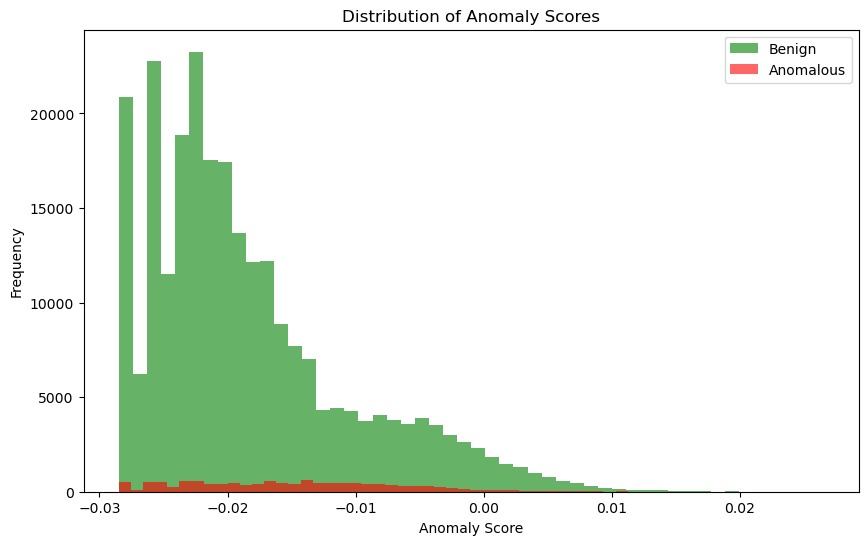

In [32]:
# compute anomaly scores on the training data
scores = iso_forest.decision_function(X_train)

# convert scores to a more intuitive format (higher means more normal)
scores = -scores

# reshape the scores to match the number of rows in X_train
scores = scores.reshape(-1, 1)

# separate the scores for anomalous and benign entries
y_train_np = np.array(y_train)

scores_anomalous = scores[y_train_np == 1]
scores_benign = scores[y_train_np == 0]

# plotting the scores
plt.figure(figsize=(10, 6))
plt.hist(scores_benign, bins=50, alpha=0.6, color='green', label='Benign')
plt.hist(scores_anomalous, bins=50, alpha=0.6, color='red', label='Anomalous')
plt.title("Distribution of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()



## Anomaly Detection

Training Results
Counter({0: 252001, 1: 12360})
Testing Results
Counter({0: 63001, 1: 3090})


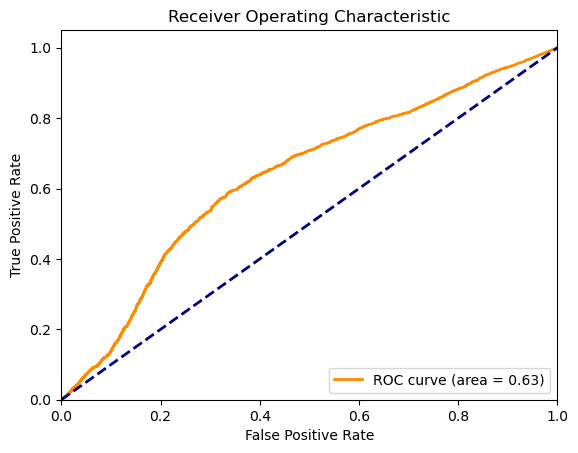

Optimal Threshold: -0.01720895870337208


In [33]:
# compute anomaly scores (negative scores indicate anomalies)
scores_train = iso_forest.decision_function(X_train)
scores_test = iso_forest.decision_function(X_test)

# apply the cutoff threshold
cutoff = 0.13
predictions_train = scores_train < cutoff
predictions_test = scores_test < cutoff

print("Training Results")
print(Counter(y_train[predictions_train]))

print("Testing Results")
print(Counter(y_test[predictions_test]))

# plotting ROC curve to find a better threshold
fpr, tpr, thresholds = roc_curve(y_test, -scores_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)


In [34]:
from sklearn.metrics import confusion_matrix, classification_report

# The optimal threshold you found
optimal_threshold = -0.016635636759359973

# Apply the optimal threshold to classify instances in the training set
train_predictions = iso_forest.decision_function(X_train) < optimal_threshold
train_predictions = np.where(train_predictions, 1, 0)  # Convert to binary labels (1 for anomalies, 0 for normal)

# Apply the optimal threshold to classify instances in the test set
test_predictions = iso_forest.decision_function(X_test) < optimal_threshold
test_predictions = np.where(test_predictions, 1, 0)  # Convert to binary labels

# Evaluate the model's performance on the training set
print("Training Set Evaluation:")
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

# Evaluate the model's performance on the test set
print("Test Set Evaluation:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))


Training Set Evaluation:
[[251935     66]
 [ 12357      3]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98    252001
           1       0.04      0.00      0.00     12360

    accuracy                           0.95    264361
   macro avg       0.50      0.50      0.49    264361
weighted avg       0.91      0.95      0.93    264361

Test Set Evaluation:
[[62982    19]
 [ 3089     1]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     63001
           1       0.05      0.00      0.00      3090

    accuracy                           0.95     66091
   macro avg       0.50      0.50      0.49     66091
weighted avg       0.91      0.95      0.93     66091

